The node h is not dominated by the given set. Its neighbors are ['f']
Is ['e', 'g'] a dominating set of Graph 1? False


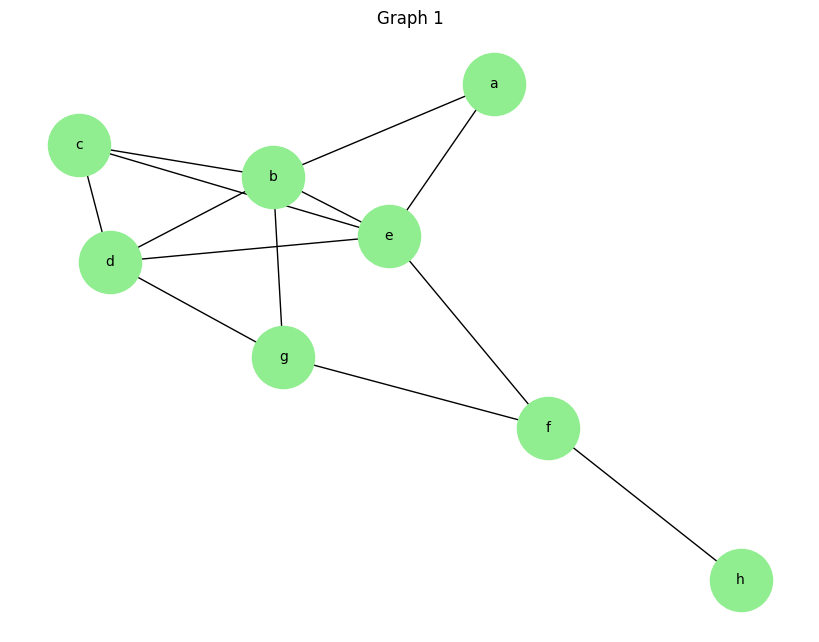

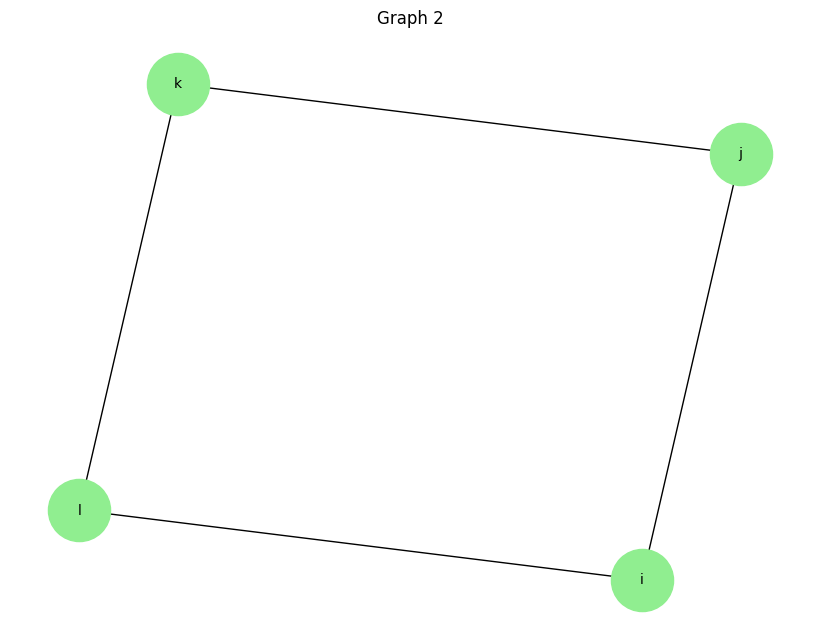

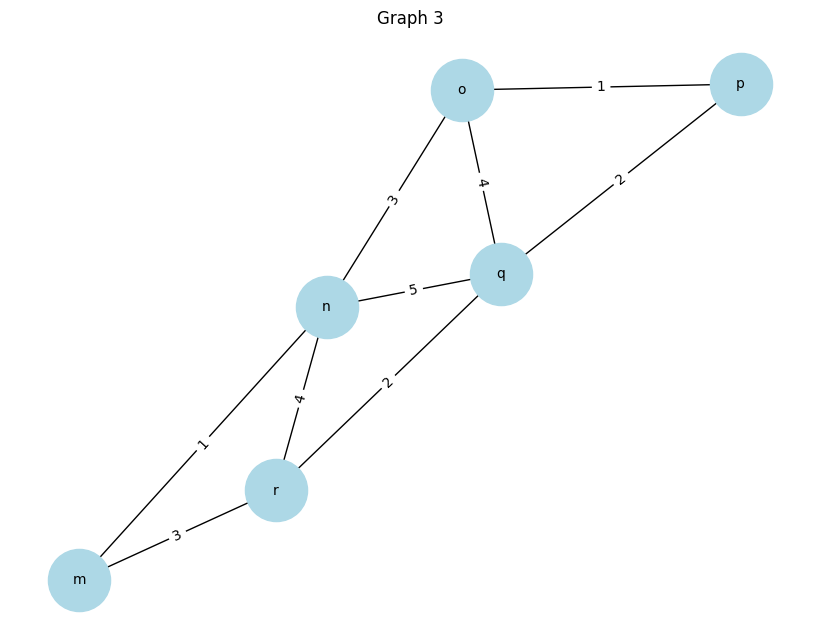

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graphs based on your Prolog definitions
def create_graphs():
    graphs = []

    # Graph 1: Unweighted
    G1 = nx.Graph()
    G1.add_edges_from([
        ('a', 'b'), ('a', 'e'), ('b', 'c'), ('b', 'g'), ('b', 'd'),
        ('b', 'e'), ('c', 'e'), ('c', 'd'), ('d', 'e'), ('d', 'g'),
        ('e', 'f'), ('f', 'g'), ('f', 'h')
    ])
    graphs.append((G1, "Graph 1"))

    # Graph 2: Unweighted
    G2 = nx.Graph()
    G2.add_edges_from([
        ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')
    ])
    graphs.append((G2, "Graph 2"))

    # Graph 3: Weighted
    G3 = nx.Graph()
    G3.add_weighted_edges_from([
        ('m', 'n', 1), ('m', 'r', 3), ('n', 'r', 4), ('n', 'o', 3),
        ('n', 'q', 5), ('o', 'q', 4), ('o', 'p', 1), ('p', 'q', 2), ('q', 'r', 2)
    ])
    graphs.append((G3, "Graph 3"))

    return graphs

# Visualization function
def visualize_graphs(graphs):
    for G, title in graphs:
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout

        if title == "Graph 3" or title == "Cities Graph":  # Weighted graph
            weights = nx.get_edge_attributes(G, 'weight')
            nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
            nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=10)
        else:  # Unweighted graphs
            nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10)

        plt.title(title)
        plt.show()

def is_dominating_set(G, nodes):
    ret = nx.is_dominating_set(G, nodes)
    # If ret is false, determine the first node that is not dominated
    if not ret:
        for node in G.nodes:
            # if the node is in the dominating set directly skip to the next node
            if node in nodes:
                continue
            # if the node is not in the dominating set, check if it has a neighbor that is not in the dominating set
            if not any(neighbor in nodes for neighbor in G.neighbors(node)):
                print(f"The node {node} is not dominated by the given set. Its neighbors are {list(G.neighbors(node))}")
                return ret
    return ret

# Test if [e, g] is a dominating set of Graph 1
G1, _ = create_graphs()[0]
dominating_set = ['e', 'g']
print(f"Is {dominating_set} a dominating set of Graph 1? {is_dominating_set(G1, dominating_set)}")

# Main script
if __name__ == "__main__":
    graphs = create_graphs()
    visualize_graphs(graphs)


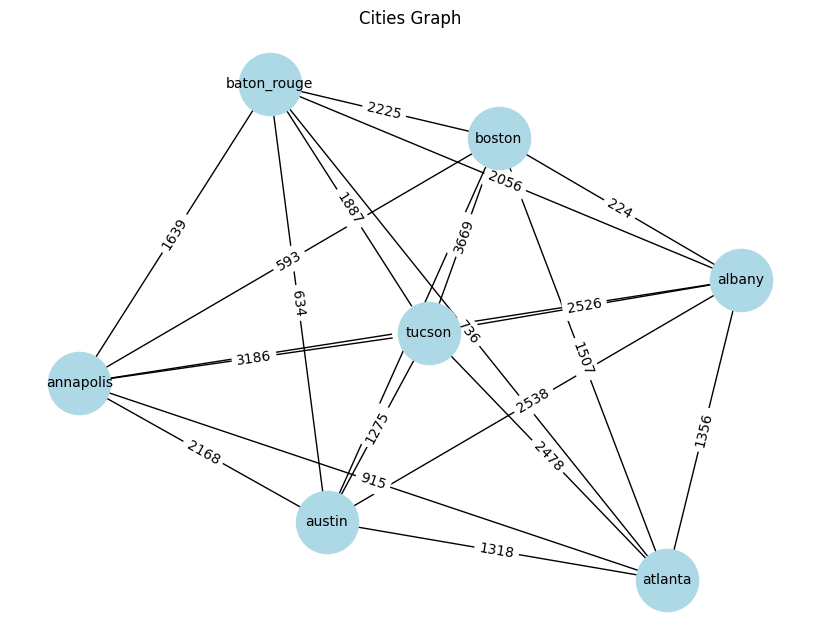

In [7]:
# dist(albany, annapolis, 469).
# dist(albany, atlanta, 1356).
# dist(albany, austin, 2538).
# dist(albany, baton_rouge, 2056).
# dist(albany, boston, 224).
# dist(atlanta, annapolis, 915).
# dist(atlanta, austin, 1318).
# dist(atlanta, baton_rouge, 736).
# dist(atlanta, boston, 1507).
# dist(annapolis, austin, 2168).
# dist(annapolis, baton_rouge, 1639).
# dist(annapolis, boston, 593).
# dist(austin, baton_rouge, 634).
# dist(austin, boston, 2729).
# dist(baton_rouge, boston, 2225).
# dist(tucson, atlanta, 2478).
# dist(tucson, albany, 2526).
# dist(tucson, annapolis, 3186).
# dist(tucson, baton_rouge, 1887).
# dist(tucson, boston, 3669).
# dist(tucson, austin, 1275).

def create_cities_graph():
    G = nx.Graph()
    G.add_weighted_edges_from([
        ('albany', 'annapolis', 469), ('albany', 'atlanta', 1356), ('albany', 'austin', 2538),
        ('albany', 'baton_rouge', 2056), ('albany', 'boston', 224), ('atlanta', 'annapolis', 915),
        ('atlanta', 'austin', 1318), ('atlanta', 'baton_rouge', 736), ('atlanta', 'boston', 1507),
        ('annapolis', 'austin', 2168), ('annapolis', 'baton_rouge', 1639), ('annapolis', 'boston', 593),
        ('austin', 'baton_rouge', 634), ('austin', 'boston', 2729), ('baton_rouge', 'boston', 2225),
        ('tucson', 'atlanta', 2478), ('tucson', 'albany', 2526), ('tucson', 'annapolis', 3186),
        ('tucson', 'baton_rouge', 1887), ('tucson', 'boston', 3669), ('tucson', 'austin', 1275)
    ])
    return G


G = create_cities_graph()

# Visualize the cities graph
visualize_graphs([(G, "Cities Graph")])

